In [13]:
MILLON=1000000

MIL=1000
CIEN=100
DIEZ=10
solucion=""

def enletras(indice1, indice2):
    global solucion
    numeros=["un","uno", "dos", "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve"];

    dieces=["once", "doce", "trece", "catorce", "quince", "dieciseis", "diecisiete", "dieciocho", "diecinueve"];

    decenas=["diez", "veinte", "treinta", "cuarenta", "cincuenta", "sesenta", "setenta", "ochenta", "noventa"];

    centenas=["cien", "doscientos", "trescientos", "cuatrocientos","quinientos", "seiscientos" ,"setecientos","ochocientos" ,"novecientos"];

    millares=["mil", "millÂ¢n", "millones"];

    if indice2==0:
        return numeros[int(indice1)];

    if indice2==1:
        return dieces[int(indice1)];

    if indice2==2:
        return decenas[int(indice1)];

    if indice2==3:
        return centenas[int(indice1)];

    return millares[int(indice1)];

def millares(a_numerode, indice):
    global solucion
    indice2=0
    indice3=0;

    if(indice == 0):
        indice3 = 0;

    else:
        indice2 = 2;
        indice3 = 1;

    if(a_numerode > 1):
        solucion+=(" " + str(enletras(indice2,4)));

    else:
        solucion+=(str(enletras(0,0)) + " " + str(enletras(indice3,4)));

def i_enletras(a_numerode):
    global solucion
    if(a_numerode == 1):
        solucion+=( " " + str(enletras(a_numerode,0)));

    elif(a_numerode > 1 and a_numerode < 10):
        solucion+=(" " + str(enletras(a_numerode,0)));

    elif(a_numerode > 10 and a_numerode < 20):
        solucion+=( " " + str(enletras(a_numerode % DIEZ - 1,1)));

    elif((a_numerode % DIEZ) == 0 and a_numerode < CIEN):
        solucion+=( " " + str(enletras((a_numerode/DIEZ)-1,2)));

    elif((a_numerode % CIEN) == 0 and a_numerode < MIL):

        solucion+=(" "+str(enletras((a_numerode/CIEN)-1,3)));

        if(a_numerode==100):
            solucion+=( "to ");


    elif((a_numerode % MIL) == 0 and a_numerode < MILLON):
        millares(a_numerode / MIL,0);

    elif((a_numerode % MILLON) == 0):
        millares(a_numerode / MILLON,1);

# Resta a la cantidad para seguir con el ciclo de evaluaciÂ¢n

def residuo(cantidad, valor):
    global solucion
    i_enletras(cantidad-(cantidad % valor));

    cantidad = cantidad % valor;
    return cantidad

# FunciÂ¢n principal de evaluaciÂ¢n

def imprimir(a_cantidad):
    global solucion
    solucion=""
    if(a_cantidad < 1 or a_cantidad > 2147483647):
        raise(SIGFPE); 
    while(a_cantidad > 0):

        if(a_cantidad >= MILLON):

            if(a_cantidad/MILLON > 1):
                imprimir (a_cantidad/MILLON); 
            a_cantidad= residuo(a_cantidad, MILLON);

        

        elif(a_cantidad >= MIL):

            if(a_cantidad/MIL > 1):
                imprimir (a_cantidad/MIL); 
            a_cantidad=residuo(a_cantidad, MIL);


        elif(a_cantidad >= CIEN):

            a_cantidad=residuo(a_cantidad, CIEN);

        elif(a_cantidad == DIEZ or a_cantidad > 19):

            a_cantidad=residuo(a_cantidad, DIEZ);

            if(a_cantidad > 0):
                solucion+=(" y");


        else:

            a_cantidad =residuo(a_cantidad, a_cantidad);
    return solucion



In [14]:
print(imprimir(int(input())))

45
 cuarenta y cinco


In [15]:
def count(s,letter):
    c=0
    for i in s:
        if i==letter:
            c+=1
    return c

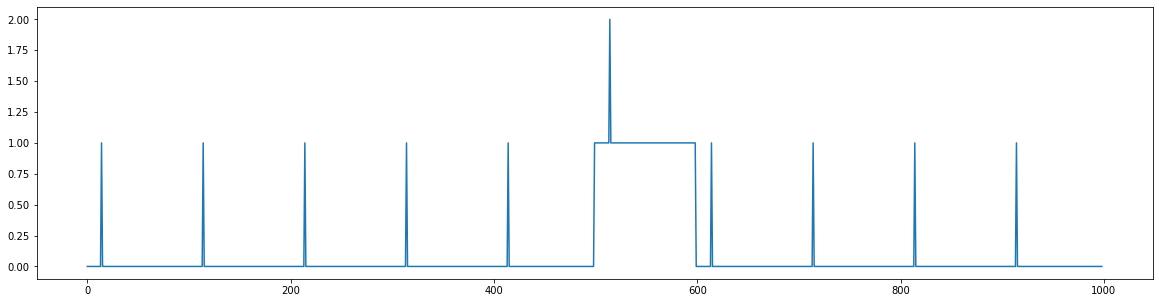

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

y=[]
for i in range(1,1000):
    y+=[count(imprimir(i),'q')]
plt.subplot(1,1,1)
plt.plot(y)



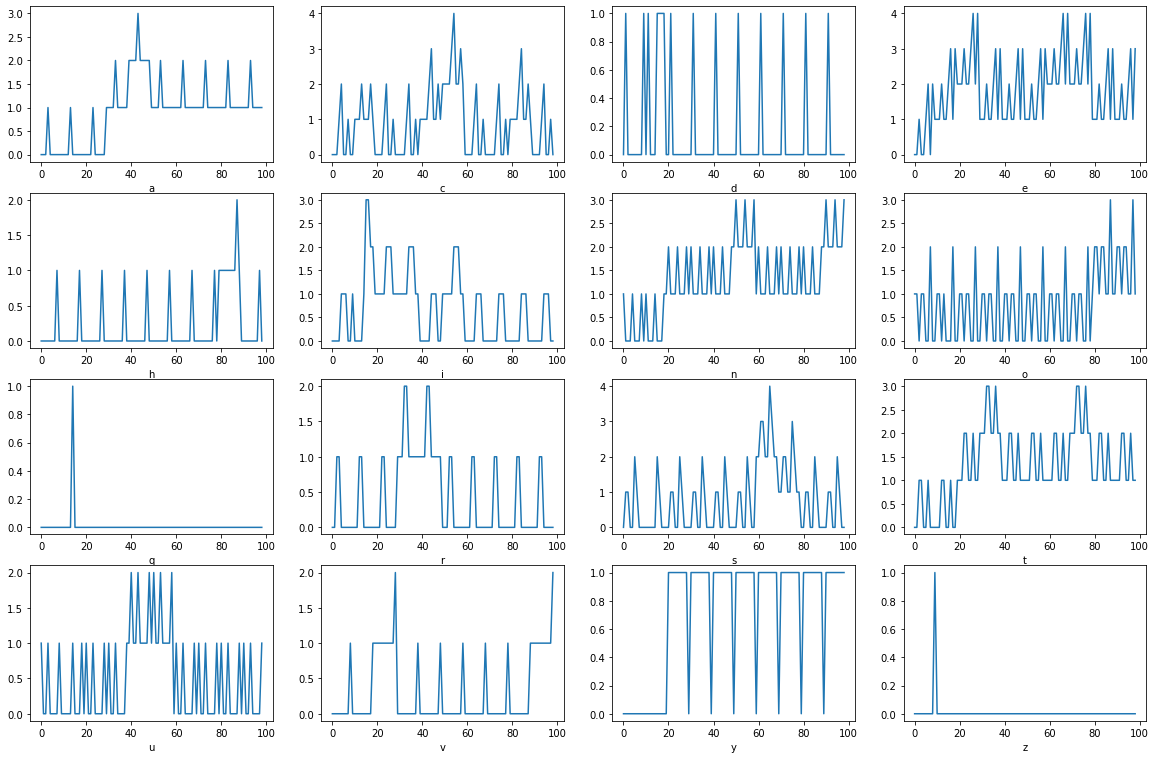

In [53]:
plt.figure(figsize=(20,20))

z=0
for j in range(0,26):
    y=[]
    for i in range(1,100):
        y+=[count(imprimir(i),chr(j+97))]
    if(1 in y or 2 in y):
        plt.subplot(6,4,z+1)
        plt.plot(y)
        plt.xlabel(chr(j+97))
        z+=1

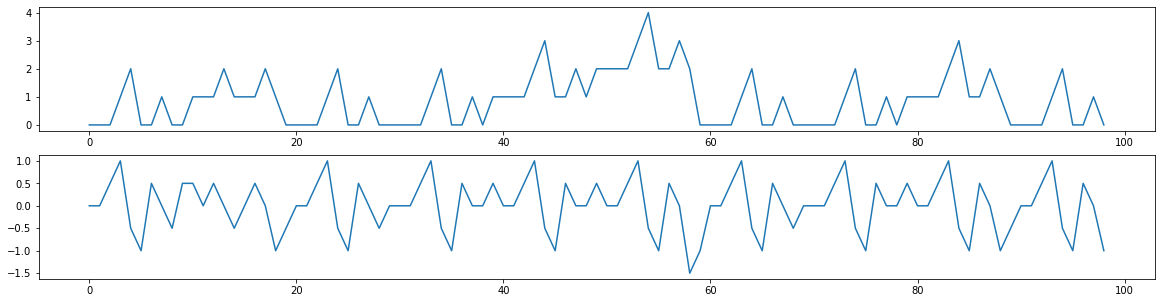

In [62]:
plt.figure(figsize=(20,5))
s=100
y=[]
for i in range(1,s):
    y+=[count(imprimir(i),'c')]
plt.subplot(2,1,1)
plt.plot(y)

y2=[]



for i in range(0,s-1):
    if(i==0):
        y2+=[y[i+1]-y[i]]
    elif i==s-2:
        y2+=[y[i]-y[i-1]]
    else:
        y2+=[(y[i+1]-y[i-1])/2]

plt.subplot(2,1,2)
plt.plot(y2)

In [57]:
len(y)

999